----------------------------------------

In [23]:
from kan import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# initialize KAN with G=3
model = KAN(width=[2, 1, 1], grid=3, k=3, seed=1, device=device)

import torch

# Определение функции f
f = lambda x: torch.exp(torch.sin(torch.pi * x[:, [0]]) + x[:, [1]] ** 2)

# Создание входных данных x
x = torch.randn(100, 2)  # Создаем 100 случайных точек в двумерном пространстве

# Применение функции f к входным данным для получения выходных значений y
y = f(x)

# Создание двумерного тензора, где первый столбец содержит x[:, 0], а второй столбец содержит y
result = torch.cat((x[:, [0]], y), dim=1)

# Вывод результата
print(result)
print(result.shape)  # Проверка размерности тензора
dataset  = create_dataset_from_data(result,result, train_ratio=0.8, device=device) #create_dataset(f, n_var=10, device=device)

cpu
checkpoint directory created: ./model
saving model version 0.0
tensor([[ 2.0154e+00,  1.0993e+00],
        [-5.2419e-01,  9.5354e+00],
        [-1.3083e+00,  2.7998e+00],
        [ 1.1422e+00,  6.9066e-01],
        [-7.4787e-01,  1.7103e+00],
        [ 2.9814e-01,  2.2651e+00],
        [-6.4634e-01,  4.9041e-01],
        [ 1.4761e+00,  8.9865e+00],
        [ 1.0343e-02,  2.7187e+00],
        [ 8.7929e-01,  1.1868e+01],
        [-1.1802e+00,  2.0228e+00],
        [ 4.0845e-01,  2.7883e+00],
        [-9.8228e-01,  5.4941e+00],
        [ 8.5472e-01,  1.6810e+00],
        [ 7.0002e-01,  1.8747e+01],
        [ 1.6089e+00,  3.9329e-01],
        [-1.5999e-01,  7.9689e-01],
        [-1.4746e+00,  3.0450e+00],
        [-3.0026e-01,  2.4600e+00],
        [-1.1628e+00,  1.6549e+00],
        [ 1.9907e+00,  2.2839e+00],
        [-9.3010e-01,  6.2182e+00],
        [ 4.2077e-01,  2.9873e+00],
        [ 7.6393e-01,  2.7798e+00],
        [ 1.1120e+00,  1.0350e+00],
        [ 1.9382e-01,  1.4010e+03

In [24]:
dataset

{'train_input': tensor([[ 1.3245e+00,  4.2874e-01],
         [ 1.7710e+00,  3.0279e+01],
         [ 1.2540e+00,  2.8475e+00],
         [ 3.4698e-01,  3.7209e+00],
         [ 8.9555e-01,  1.4195e+00],
         [-1.4746e+00,  3.0450e+00],
         [ 3.4001e-01,  3.6397e+00],
         [ 1.5586e+00,  4.3910e-01],
         [-4.4814e-01,  4.0448e-01],
         [-2.4919e+00,  3.9024e-01],
         [ 7.5612e-01,  9.6886e+00],
         [-6.2003e-01,  4.1574e-01],
         [ 9.8728e-01,  1.1081e+00],
         [ 2.5571e+00,  4.8437e+00],
         [-6.3784e-01,  7.8359e-01],
         [-4.3119e-01,  3.8597e-01],
         [-1.2629e+00,  7.3460e+00],
         [-1.7943e+00,  1.8450e+01],
         [-6.9945e-01,  6.0732e-01],
         [-1.1802e+00,  2.0228e+00],
         [-1.3083e+00,  2.7998e+00],
         [-4.7417e-02,  4.7627e+01],
         [ 1.5786e+00,  1.3177e+00],
         [-1.0025e+00,  2.4674e+00],
         [-1.1628e+00,  1.6549e+00],
         [ 3.4763e-01,  2.4504e+00],
         [ 7.5142e-01, 

In [25]:
# initialize KAN with G=3
model = KAN(width=[2,1,1], grid=3, k=3, seed=1, device=device)

checkpoint directory created: ./model
saving model version 0.0


In [26]:
model.fit(dataset, opt="LBFGS", steps=20);

| train_loss: 1.28e+04 | test_loss: 4.19e+03 | reg: 6.75e+00 | : 100%|█| 20/20 [00:00<00:00, 36.59it

saving model version 0.1


In [27]:
# initialize a more fine-grained KAN with G=10
model = model.refine(10)

saving model version 0.2


In [28]:
model.fit(dataset, opt="LBFGS", steps=20);

| train_loss: 1.28e+04 | test_loss: 5.05e+03 | reg: 6.66e+00 | : 100%|█| 20/20 [00:00<00:00, 35.18it


saving model version 0.3


----------------------------------------------------

In [10]:
from kan import *


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# initialize KAN with G=3
model = KAN(width=[10,1,1], grid=3, k=3, seed=1, device=device)

# create dataset
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=10, device=device)

cpu
checkpoint directory created: ./model
saving model version 0.0


In [11]:
model.fit(dataset, opt="LBFGS", steps=20);

| train_loss: 1.35e-02 | test_loss: 1.46e-02 | reg: 6.99e+00 | : 100%|█| 20/20 [00:03<00:00,  6.57it

saving model version 0.1


In [12]:
# initialize a more fine-grained KAN with G=10
model = model.refine(100)

saving model version 0.2


In [13]:
model.fit(dataset, opt="LBFGS", steps=20);

| train_loss: 4.60e-05 | test_loss: 1.85e-03 | reg: 6.95e+00 | : 100%|█| 20/20 [00:07<00:00,  2.57it

saving model version 0.3


In [5]:
grids = np.array([3,10,20,50,100])


train_losses = []
test_losses = []
steps = 200
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[2,1,1], grid=grids[i], k=k, seed=1, device=device)
    if i != 0:
        model = model.refine(grids[i])
    results = model.fit(dataset, opt="LBFGS", steps=steps)
    train_losses += results['train_loss']
    test_losses += results['test_loss']

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.36e-02 | test_loss: 1.39e-02 | reg: 0.00e+00 | :  26%|▎| 51/200 [00:03<00:10, 14.25i


KeyboardInterrupt: 

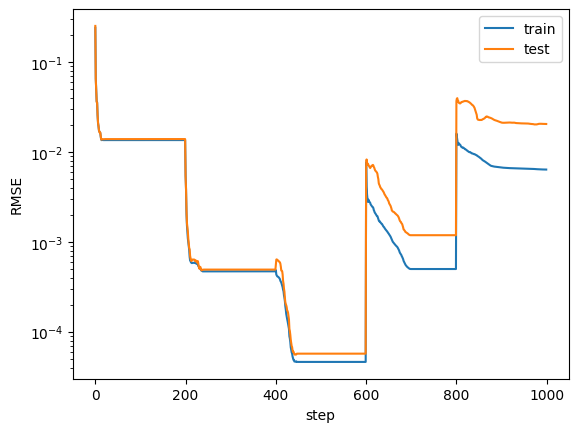

In [16]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

Text(0, 0.5, 'RMSE')

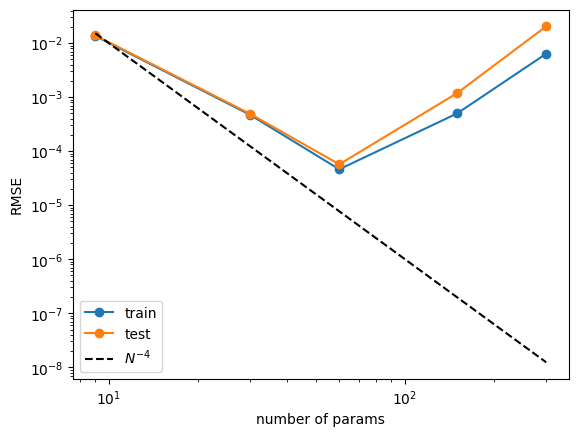

In [17]:
n_params = 3 * grids
train_vs_G = train_losses[(steps-1)::steps]
test_vs_G = test_losses[(steps-1)::steps]
plt.plot(n_params, train_vs_G, marker="o")
plt.plot(n_params, test_vs_G, marker="o")
plt.plot(n_params, 100*n_params**(-4.), ls="--", color="black")
plt.xscale('log')
plt.yscale('log')
plt.legend(['train', 'test', r'$N^{-4}$'])
plt.xlabel('number of params')
plt.ylabel('RMSE')